In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Apr  9 15:45:01 2021

@author: Yilber Quinto
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def newton(f, df, x0, tol, M):
    '''
    

    Parameters
    ----------
    f : Función
         Función de números reales 
    df : Función
         Derivada de la función f
    x0 : float
         Punto inicial x0
    tol : float
          Tolerancia 
    M : int 
        Número máximo de interaciones     

    Returns
    -------
    Exito "El cero de la funcion es x = p"
    
    Fracaso " El método fracasó después de M interaciones "

    '''
    
    
    valores = [x0]
    error   = [np.nan]
    
    i = 0
    while i < M: 
        x = x0 - f(x0)/df(x0)
        e = np.abs(x - x0)
        
        valores.append(float(f'{x:.9f}'))
        error.append(float(f'{e:.9f}'))
        
        if e < tol:
            df = pd.DataFrame({'x_n':valores,'e_n':error})
            df.to_excel('Tabla_método_Newton.xlsx') 
            display(pd.read_excel("Tabla_método_Newton.xlsx",index_col=0))
            print('')
            print(f'El cero de la función es: {x:.9f}')
            return x 
        else:
            x0 = x
        i = i + 1    
    if i == M:
        df = pd.DataFrame({'x_n':valores,'e_n':error})
        df.to_excel('Tabla_método_Newton.xlsx') 
        display(pd.read_excel("Tabla_método_Newton.xlsx",index_col=0))
        print(f'No se logró una aproximacón despues de {M} iteraciónes')
    
       

In [2]:
#_______________Taller 1 ______Ejercicio 11___________________________________ 

def fun11(t):
    s0 = 300 
    m  = 0.25
    k  = 0.1 
    g  = 32.17
    return s0 - (m*g/k)*t + (m**2)*g/(k**2) * (1 - np.exp(-k*t/m))

def dfun11(t):          # Derivada de fun11
    m  = 0.25
    k  = 0.1 
    g  = 32.17
    return   m*g/k *( -1 + np.exp(-k*t/m))

#-----------------------------------------------------------------------------


# Ejercicio 13b

,x_n,e_n
0,4.000000,NaN
1,12.859872,8.859872
2,10.667828,2.192044
3,11.061127,0.393299
4,11.077874,0.016747
5,11.077904,0.000029
6,11.077904,0.000000



El cero de la función es: 11.077903587


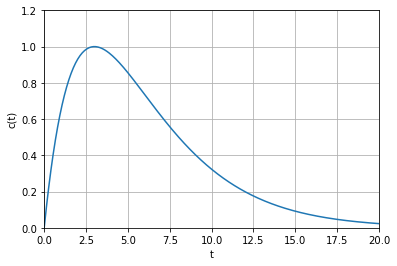

In [3]:
def fun13b(t):          # Función f, a la cual se le calcula el cero 
    A = np.exp(1)/3
    return  -0.25 + A*t*np.exp(-t/3)


def dfun13b(t):         # Derivada de f
    A = np.exp(1)/3
    return  A*np.exp(-t/3)*(1 - t/3)


# Cálculo del del cero de f    
x =  newton(fun13b, dfun13b, 4, 1e-5, 50)


# Grafica de la función de concentración c(t)

def c(t):
    A = np.exp(1)/3
    return A*t*np.exp(-t/3)


fig, ax = plt.subplots()
ax.set_xlabel('t')
ax.set_ylabel('c(t)')    
plt.grid() # visualiza la cuadricula en la figura    
plt.ylim(0, 1.2)
plt.xlim(0, 20)    

    
z = np.linspace(0,20, 300)
y = c(z)

#y2 = np.sin(z)*f(z)

plt.plot(z, y, label='f1')
#plt.plot(z,y2, label='f2')

#plt.legend(loc='upper left')
plt.savefig("Ejercicio_13a.eps")

plt.show()


# Ejercicio 13c

,x_n,e_n
0,16.000000,NaN
1,20.539963,4.539963e+00
2,21.193686,6.537224e-01
3,21.238117,4.443113e-02
4,21.238315,1.982440e-04
5,21.238315,4.000000e-09



El cero de la función es: 21.238315169


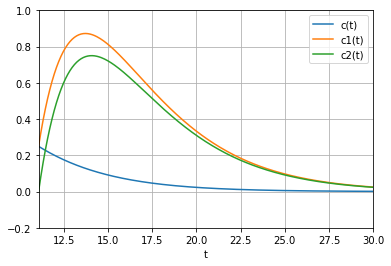

In [4]:
def fun13c(t):          # Función f. 
    A = np.exp(1)/3
    t1 = 11.0833333333333334
    if t >= t1:
        return  -0.25 + A*t*np.exp(-t/3) + 0.75*A*(t - t1)*np.exp(-(t - t1)/3)

    
def dfun13c(t):       # Derivada de f
    A = np.exp(1)/3
    t1 = 11.0833333333333334
    if t >= t1:
        return A*np.exp(-t/3)*(1 - t/3) + 0.75*A*np.exp(-(t - t1)/3)*(1 - (t -t1)/3)


# Cálculo del del cero de f    
x =  newton(fun13c, dfun13c, 16, 1e-5, 50)


# Grafica de las funciones de concentración c(t), c1(t) y c2(t)


def c(t):                # Concentración de la primera dosis c(t)     
    A = np.exp(1)/3
    return A*t*np.exp(-t/3)


def c1(t):               # Concentración de la segunda dosis c1(t) más adicción de c(t)
    A = np.exp(1)/3
    t1 = 11.0833333333333334
    if (t >= t1).all:            # Este método es necesario para poder graficar la función utilizando Numpy 
        return   A*t*np.exp(-t/3) + 0.75*A*(t - t1)*np.exp(-(t - t1)/3)


def c2(t):              # Concentración de la segunda dosis c1(t) sin adicción de c(t)
    A = np.exp(1)/3
    t1 = 11.0833333333333334
    if (t >= t1).all:            # Este metodo es necesario para poder graficar la función utilizando Numpy 
        return 0.75*A*(t - t1)*np.exp(-(t - t1)/3)
    
    
    
    
t1 = 11.0833333333333334

fig, ax = plt.subplots()
ax.set_xlabel('t')
#ax.set_ylabel('f(t)')    
plt.grid() # visualiza la cuadricula en la figura    
plt.ylim(-0.2, 1)
plt.xlim(t1, 30) 

z = np.linspace(t1,30, 300)
y = c(z)
y1 = c1(z)
y2 = c2(z)

plt.plot(z, y, label='c(t)')
plt.plot(z,y1, label='c1(t)')
plt.plot(z,y2, label='c2(t)')

plt.legend()

#plt.savefig("Ejercicio_13c.eps")  # Guarda la grafica en formato .eps

plt.show()

# Ejercicio 18 a)

,x_n,e_n
0,6.000000,NaN
1,7.819681,1.819681
2,7.401783,0.417898
3,7.199655,0.202127
4,7.133323,0.066333
5,7.117315,0.016008
6,7.113930,0.003385
7,7.113239,0.000691
8,7.113099,0.000140
9,7.113071,0.000028



El cero de la función es: 7.113064881


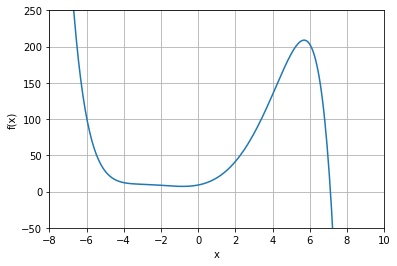

In [5]:
def fun18a1(x):
    return x**3 - np.sinh(x) + 4*(x**2) + 6*x + 9

def dfun18a1(x):
    return x**2 - np.cosh(x) + 8*x + 6 


# Cálculo del del cero de f            
x =  newton(fun18a1, dfun18a1, 6.0, 1e-5, 50)

# Gráfica 
fig, ax = plt.subplots()
ax.set_xlabel('x')
ax.set_ylabel('f(x)')    
plt.grid() # visualiza la cuadricula en la figura 
plt.xlim(-8, 10)    
plt.ylim(-50, 250)    
    
z = np.linspace(-8,10, 300)
y = fun18a1(z)

#y2 = np.sin(z)*f(z)

plt.plot(z, y, label='f')
#plt.plot(z,y2, label='f2')

#plt.legend(loc='upper left')

plt.savefig("Ejercicio_18a_1.eps")  # Guarda la grafica en formato .eps

plt.show()


,x_n,e_n
0,1.000000,NaN
1,2.641422,1.641422e+00
2,1.496522,1.144899e+00
3,1.445868,5.065418e-02
4,1.384079,6.178899e-02
5,1.332051,5.202819e-02
6,1.309353,2.269806e-02
7,1.306370,2.982479e-03
8,1.306327,4.343900e-05
9,1.306327,9.000000e-09



El cero de la función es: 1.306326940


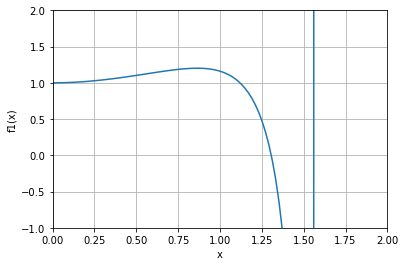

In [6]:

def fun18a2(x):
    return np.exp(x) - np.tan(x)


def dfun18a2(x):
    return np.exp(x) - 1/(np.cos(x))**2 



# Cálculo del del cero de f                    
x =  newton(fun18a2, dfun18a2, 1.0, 1e-5, 50)


# Gráfica 
fig, ax = plt.subplots()
ax.set_xlabel('x')
ax.set_ylabel('f1(x)')    
plt.grid() # visualiza la cuadricula en la figura 
plt.xlim(0, 2)    
plt.ylim(-1, 2)    
    
z = np.linspace(0,2, 100)
y = fun18a2(z)

#y2 = np.sin(z)*f(z)

plt.plot(z, y, label='f1')
#plt.plot(z,y2, label='f2')

#plt.legend(loc='upper left')
plt.savefig("Ejercicio_18a_2.eps")  # Guarda la grafica en formato .eps

plt.show()


# Ejercicio 18 b)

,x_n,e_n
0,0.000100,NaN
1,0.000150,5.000000e-05
2,0.000225,7.500000e-05
3,0.000338,1.125000e-04
4,0.000506,1.687500e-04
5,0.000759,2.531250e-04
6,0.001139,3.796870e-04
7,0.001709,5.695310e-04
8,0.002563,8.542960e-04
9,0.003844,1.281442e-03



El cero de la función es: 0.947747134


,x_n,e_n
0,0.100000,NaN
1,0.149829,4.982930e-02
2,0.224153,7.432329e-02
3,0.334116,1.099632e-01
4,0.493133,1.590175e-01
5,0.705686,2.125530e-01
6,0.906876,2.011893e-01
7,0.948571,4.169565e-02
8,0.947748,8.234930e-04
9,0.947747,5.300000e-07



El cero de la función es: 0.947747134


,x_n,e_n
0,1.000000,NaN
1,0.950778,0.049222
2,0.947754,0.003023
3,0.947747,0.000007



El cero de la función es: 0.947747134


,x_n,e_n
0,1.400000,NaN
1,1.317772,8.222819e-02
2,1.203600,1.141718e-01
3,1.067811,1.357887e-01
4,0.968852,9.895911e-02
5,0.948155,2.069739e-02
6,0.947747,4.075520e-04
7,0.947747,1.290000e-07



El cero de la función es: 0.947747134


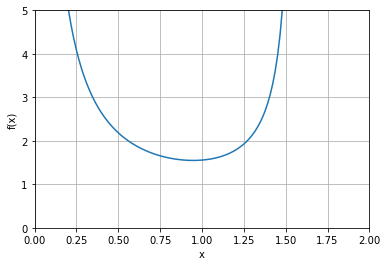

In [7]:
def fun18b(x):
    return (np.tan(x))/x**2

def dfun18b(x):
    return -2*(np.tan(x))/x**3 + 1/((x * np.cos(x))**2)

def ddfun18b(x):
    return 6*(1/x**4)*np.tan(x) - 2*(1/x**2)*(1/(np.cos(x))**2)*(2*(1/x) - np.tan(x))

# Cálculo del del cero de f                    
x =  newton(dfun18b, ddfun18b, 0.0001, 1e-5, 50)

x =  newton(dfun18b, ddfun18b, 0.1, 1e-5, 50)
x =  newton(dfun18b, ddfun18b, 1.0, 1e-5, 50)
x =  newton(dfun18b, ddfun18b, 1.4, 1e-5, 50)



# Gráfica 
fig, ax = plt.subplots()
ax.set_xlabel('x')
ax.set_ylabel('f(x)')    
plt.grid() # visualiza la cuadricula en la figura 
plt.xlim(0, 2)    
plt.ylim(0, 5)    
    
z = np.linspace(0.1,np.pi/2, 100)
y = fun18b(z)

#y2 = np.sin(z)*f(z)

plt.plot(z, y, label='f1')
#plt.plot(z,y2, label='f2')

#plt.legend(loc='upper left')

plt.savefig("Ejercicio_18b.eps")  # Guarda la grafica en formato .eps

plt.show()

# Ejercicio 18c

,x_n,e_n
0,3.000000,NaN
1,2.038543,9.614571e-01
2,1.486761,5.517816e-01
3,1.264785,2.219763e-01
4,1.228773,3.601218e-02
5,1.227891,8.814500e-04
6,1.227891,5.180000e-07



El cero de la función es: 1.227890846


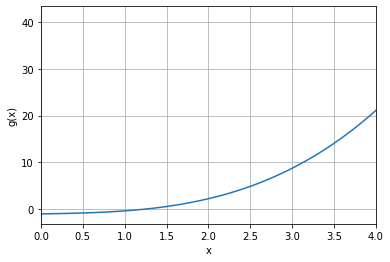

In [8]:
# Aprocimación de x0



def fun24g(x):        # Función g(x0) ejercicio 24 
    a = 3*(np.sqrt(3))/16  
    return a*x*(1 + x**2) - 1



def dfun24g(x):       # Derivada de g(x0)
    a = 3*(np.sqrt(3))/16 
    return a*(1 + 3*(x**2))




# Cálculo del del cero de g                    
x =  newton(fun24g, dfun24g, 3.0, 1e-6, 1000)




# Gráfica 
fig, ax = plt.subplots()
ax.set_xlabel('x')
ax.set_ylabel('g(x)')    
plt.grid() # visualiza la cuadricula en la figura 
plt.xlim(0, 4)    
#plt.ylim(0, 5)    
    
z = np.linspace(0,5, 100)
y = fun24g(z)

#y2 = np.sin(z)*f(z)

plt.plot(z, y, label='f1')
#plt.plot(z,y2, label='f2')

#plt.legend(loc='upper left')

#plt.savefig("Ejercicio_18b.eps")  # Guarda la grafica en formato .eps

plt.show()



,x_n,e_n
0,1.227891e+00,NaN
1,-9.972900e-01,2.225181e+00
2,5.665490e-01,1.563839e+00
3,-1.143621e-01,6.809111e-01
4,9.945440e-04,1.153566e-01
5,-1.000000e-09,9.945440e-04
6,0.000000e+00,1.000000e-09



El cero de la función es: 0.000000000

Error de estimación en los puntos iniciales: 0.163708


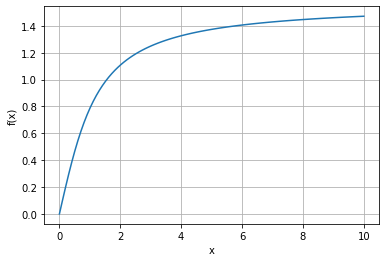

In [9]:
# Estimación del cero de f(x) = arctan(x)


def fun18c(x):
    return np.arctan(x)


def dfun18c(x):
    return 1/(1 + x**2)


def ddfun18c(x):
    return - 2*x/((1 + x**2)**2) 



# Cálculo del del cero de f                    
#x =  newton(fun18c_1, dfun18c_1, 0.5, 1e-5, 50)

# Cálculo del del cero de f 


x0  = 1.227891       # Punto inicial calculado analiticamente 
x01 = 1.391599       # Punto inicial estimado por tanteo 

x =  newton(fun18c, dfun18c, x0, 1e-6, 50)

print('')

b = x01 - x0         # error en los puntos iniciales 
print(f'Error de estimación en los puntos iniciales: {b:.6f}')



# Gráfica 
fig, ax = plt.subplots()
ax.set_xlabel('x')
ax.set_ylabel('f(x)')    
plt.grid() # visualiza la cuadricula en la figura 
#plt.xlim(0, 2)    
#plt.ylim(0, 5)    
    
z = np.linspace(0,10, 100)
y = fun18c(z)

#y2 = np.sin(z)*f(z)

plt.plot(z, y, label='f1')
#plt.plot(z,y2, label='f2')

#plt.legend(loc='upper left')

plt.show()
    